# Visión artificial aplicada a la industria
### Intecol SAS
## Clase 7: Momentos de Hu - Transformada de Fourier


In [ ]:
import matplotlib.pyplot as plt
def plot(imagen,color='white',title=None,cmapa='gray',pic = False,subplot  = (1,1,1),vmin = 0, vmax = 255):
    if pic == True:
        plt.figure(figsize=(15,8))
    plt.subplot(subplot[0],subplot[1],subplot[2])
    plt.axis('off')
    plt.imshow(imagen,cmap = cmapa,vmin = vmin, vmax = vmax)
    plt.title(title,color = color)

In [ ]:
import cv2
import numpy as np
from skimage import data 
from math import sqrt,exp
import pandas as pd

## Breve repaso : Momentos



## Momentos de una imagen

Recordemos,La clase pasada se aprendio detectar los momentos de un objeto. 
El momento es una distribucion de materia relativo a un punto o a un eje:
Definicion de momento crudo: 

$
    M_{ij} = \sum\limits_x\sum\limits_y x^iy^j I(x,y),
$
donde $x,y$ son las filas y columnas e $I(x,y)$ es la intensidad del pixel en la fila $x$ y columna $y$.

Sin embargo se puede observar que el momento crudo es dependiente de la posicion $x$ y $y$ 

Si se desea que el momento del objeto sea independiente de la traslacion se puede hablar de los momentos de segundo orden o momentos centrales:


$
M_{pq} = 
\sum\limits_x\sum\limits_y (x- \overline{x})^p * (y-\overline{y})^q I(x,y),
$


donde

$
    \overline{x} = \dfrac{M_{01}}{M_{00}}\qquad \overline{y} =\dfrac{M_{10}}{M_{00}},
$

donde $M_{00}= \sum\sum I(x,y)$ es la definición del área del objeto y $M_{01}  = \sum\sum xI(x,y)$, $M_{10}  = \sum\sum yI(x,y)$ son los momentos al rededor del eje $x,y$ respectivamente.


Sin embargo el momento central por su definicion es muy sensible a cambios como  rotacion, escalado o  refleccion.


Es aca donde entran los Momentos de hu , los cuales se utilizan frecuentemente para la extraccion de caracteristicas de forma:

Los momentos de Hu son invariantes a la rotacion , ** escalado ** y traslacion.

![](images/hu.jpg)

### ¿Como se implementa?

In [ ]:
filename = 'images/triangle.jpg'

im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)

plt.imshow(im)

In [ ]:

# Calculate Moments

moments = cv2.moments(im)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)
print(huMoments)

$h[7]$ no es comparable en magnitud a $h[1]$ por ende hay que hacer una transformacion logaritmica

In [ ]:
momentos_hu_log = - np.sign(huMoments) * np.log(np.abs(huMoments))
print(momentos_hu_log)

### Ejercicio:

Extraer cada una lista con los momentos de hu de cada uno de los objetos de la siguiente imagen y de manera analitica señalar en la tabla cuales elementos son iguales.(ojala no ver la imagen).


In [ ]:
img = cv2.imread('images/figuras.jpg',cv2.IMREAD_GRAYSCALE)
# thresh = cv2.inRange(img, 0, 10)
_,thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)
# getting the labels of the connected components
output = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
num_labels = output[0]
labels = output[1]
stats = output[2]
centroids = output[3]
momentos_hu = []
dicts = {}

# for every component in the output image
for c in centroids[1:num_labels]:
    # Tu codigo aca
    hu = huMoments.reshape((1, 7)).tolist()[0]
    momentos_hu.append(hu)
    
    



In [ ]:

cols = ["hu1", "hu2", "hu3", "hu4", "hu5", "hu6", "hu7"]
df = pd.DataFrame(momentos_hu, columns=cols)
df.head(10)

### Circulos y lineas de HOUGH :

La transformada de Hough es un metodo de extracciond e caracteristicas para detectar formas sencillas tales como circulos y lineas en una imagen

![](images/hough.jpg)
Normalmente una linea puede ser denotada como $ Y = mx + b $ , pero en el espacio de HOUGH la misma representacion de la linea se puede obtener como m vs b, asi la caracterizacion de la imagen sera un simple punto(m,b) en el espacio de hough



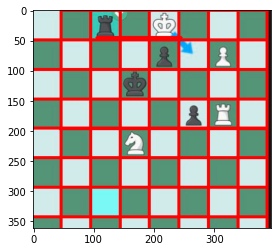

In [49]:
img = cv2.imread('images/ajedrez.jpg', cv2.IMREAD_COLOR)
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=10, maxLineGap=250)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.imshow(img)

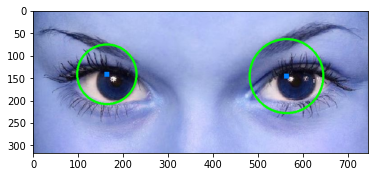

In [51]:
img = cv2.imread('images/two_eyes.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
output = img.copy()
edges = cv2.Canny(gray, 50, 200)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, img.shape[0]/2, param1=270, param2=30, minRadius=5, maxRadius=100)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
plt.imshow(output)

## Transformada de Fourier

El sonido que escuchamos , la musica, las voces y el sonido de fondo son el resultado de las vibraciones del tambor de nuestros oidos, estimulado por las ondas viajando a traveces del aire. esas vibraciones pueden ser mostradas  en reprensetancion de intensidad en una escala de tiempo , brindandonos una representacion visual del sonido:

![](images/sound.jpg)


Cualquier onda o funcion repetitiva se puede escribir como un conjunto de funciones seno de varias frecuencias y amplitudes. Este es el resultado del matematico frances Joseph Fourier. Cualquier señal escrita o constituida con ondas senosoidales, es conocida como la transformada de fourier de esa señal.  La transformada de fourier viene dada por :

![](images/fourier1.jpg)


y la transformada inversa viene dada por  :


![](images/fourier_inv.jpg)

Algunas transsformadas de fourier a funciones se observan a continuacion:

![](images/signals.jpg)


Se puede pensar de una imagen como una funcion que varia , sin embargo en vez de tiempo, la imagen varia a lo largo de un espacio de dos dimensiones. En una escala de frises que normalmente va desde 0 y 255 representando el nivel de gris del pixe. Asi la funcion de intensidad esta en funcion de las coordenadas horizontales y verticales. Por ende se puede pensar la imagne como una superficie ondulada , donde la altura de las "montañas" vienen dadas por el valor de intensidad del pixel,Como se muestra a continuacion:

![](images/fourier2d.jpg)


De esta manera las imagenes tambien puede ser descritas como funciones sinusoidales dadas en 2 dimensiones utilizando la transformada de fourier *** Discreta *** en dos dimensiones :

![](images/fourier2d_eq.jpg)

Ejemplpos de transformadas de fourier:

![](images/sin.jpg)
![](images/siny.jpg)

Debido a que la transformada de fourier es una integral podemos aplicar transformaciones lineales tales como la suma y multiplicacion, como se observa a continuacion:

![](images/addition.jpg)

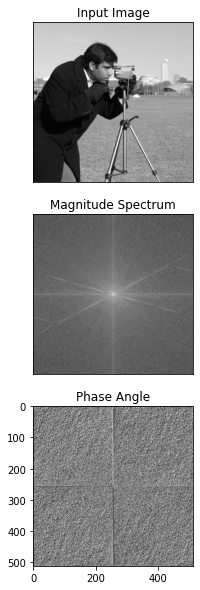

In [54]:
import skimage

img = skimage.data.camera()
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(20,10))
plt.subplot(311),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(np.angle(fshift), "gray"), plt.title("Phase Angle")
plt.show()

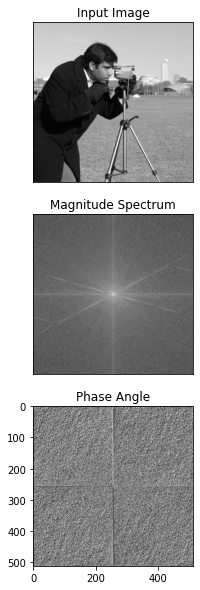

In [55]:
import skimage

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
angle = np.angle(fshift)
plt.figure(figsize=(20,10))
plt.subplot(311),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(312),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(angle, "gray"), plt.title("Phase Angle")
plt.show()

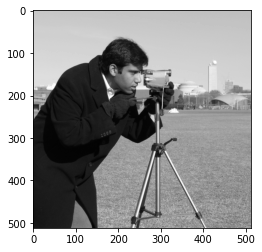

In [56]:
combined = np.multiply(np.abs(fshift), np.exp(1j*angle))

img_Combined = np.real(np.fft.ifft2(np.fft.ifftshift(combined)))

plt.imshow(img_Combined, cmap='gray')

## Ejercicio : 

Implementar un filtro pasa bajas y un filtro pasa altas utilizando transformada de fourier

In [ ]:
def distance(point1,point2):
    distance = #Escribe el codigo aca , debe ser de la forma de un circulo
    return distace

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
          ##Colocar condicional 
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
           ## condicional
                base[y,x] = 0
    return base

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

# img = cv2.imread("left01.jpg", 0)
plt.subplot(321), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(322), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(323), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(324), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(325), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(326), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()



In [ ]:
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
radio = 50
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(321), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(radio,img.shape)
plt.subplot(322), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(radio,img.shape)
plt.subplot(323), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(324), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(325), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")




## Template Matching

Es una tecnica  para encontrar que son similares a un parche o una plantilla.Una plantilla es una imagen pequeña con ciertas caracteristicas. El objetivo es encontrar dicha plantilla en una porcion de la imagen grande. 

Para lograrlo se deben definir 2 imagenes , La imagen fuente y la imagen plantilla.La idea aqui es encontrar regiones identicas de una imagen que empaten a la plantilla que se provee basado en un threshold. El threshold depende de la precision con la que se desea detectar la plantilla en la imagen fuente.

### Como funciona el matching:

La imagen de plantilla se mueve sobre la imagen de entrada (como una convolucion 2D). La plantilla y el parche de la imagen de entrada son comparadas. Si el resultado es mayor que un threshold , la porcion va a ser como detectada.






In [ ]:
img = cv2.imread('images/source_img.jpg',cv2.IMREAD_GRAYSCALE)
template= cv2.imread('images/template.jpg', 0)

plt.figure(figsize=(20,10))
plt.subplot(211),plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(212),plt.imshow(template, cmap = 'gray')
plt.title('Template')
plt.show()

### El objeto mas parecido:

In [ ]:
height, width = template.shape[::]
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
# plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(img, top_left, bottom_right, (255, 0, 0), 2) 
plt.figure(figsize=(20,20))
plt.imshow(img,cmap = 'gray')

Ejercicio: Encontrar las monedas en la imagen y dibujar un rectangulo que encuerre las monedas.


Pista: Utilizar  loc = np.where() para locarlizar los matches que superen el umbral 


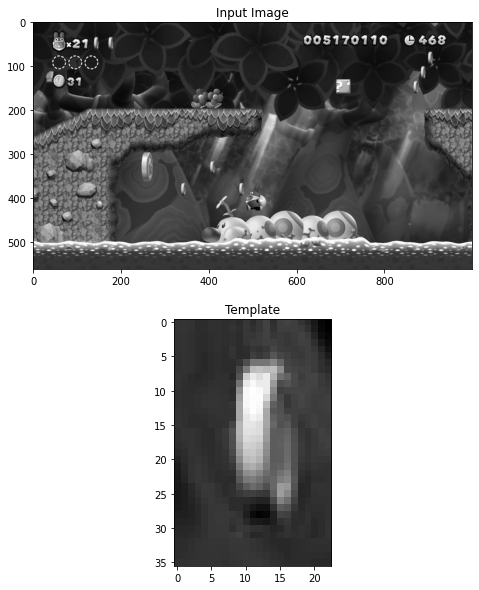

In [57]:
img_source = cv2.imread('images/mario.jpg')
img_gray = cv2.cvtColor(img_source, cv2.COLOR_BGR2GRAY)
coin= cv2.imread('images/coins.jpg', 0)

plt.figure(figsize=(20,10))
plt.subplot(211),plt.imshow(img_gray, cmap = 'gray')
plt.title('Input Image')
plt.subplot(212),plt.imshow(coin, cmap = 'gray')
plt.title('Template')
plt.show()

In [ ]:
## Codigo aca

loc = n
for pt in zip(*loc[::-1]):
    cv2.rectangle("", pt, (pt[0] + w, pt[1] + h), (255,0,0), 2)
